In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [8]:
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)       

Epoch 1/12
293/293 [==============================] - 5s 18ms/step - loss: 2.1294 - accuracy: 0.2202 - val_loss: 2.0386 - val_accuracy: 0.3032
Epoch 2/12
293/293 [==============================] - 5s 16ms/step - loss: 1.9268 - accuracy: 0.3129 - val_loss: 1.9091 - val_accuracy: 0.3664
Epoch 3/12
293/293 [==============================] - 5s 16ms/step - loss: 1.7984 - accuracy: 0.3637 - val_loss: 1.8177 - val_accuracy: 0.4050
Epoch 4/12
293/293 [==============================] - 5s 16ms/step - loss: 1.7035 - accuracy: 0.3936 - val_loss: 1.7236 - val_accuracy: 0.4358
Epoch 5/12
293/293 [==============================] - 5s 16ms/step - loss: 1.6260 - accuracy: 0.4209 - val_loss: 1.6556 - val_accuracy: 0.4507
Epoch 6/12
293/293 [==============================] - 5s 16ms/step - loss: 1.5641 - accuracy: 0.4408 - val_loss: 1.6025 - val_accuracy: 0.4782
Epoch 7/12
293/293 [==============================] - 5s 16ms/step - loss: 1.5134 - accuracy: 0.4583 - val_loss: 1.5564 - val_accuracy: 0.4851

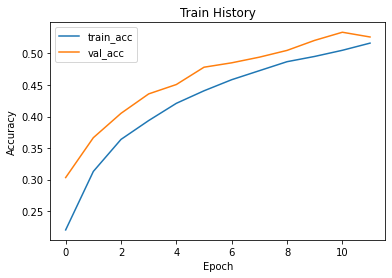

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
show_train_history('acc','val_acc')

In [17]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Epoch 1/12
293/293 [==============================] - 5s 17ms/step - loss: 0.0608 - accuracy: 0.5302 - val_loss: 0.0636 - val_accuracy: 0.5420
Epoch 2/12
293/293 [==============================] - 5s 16ms/step - loss: 0.0608 - accuracy: 0.5291 - val_loss: 0.0634 - val_accuracy: 0.5446
Epoch 3/12
293/293 [==============================] - 5s 16ms/step - loss: 0.0605 - accuracy: 0.5310 - val_loss: 0.0632 - val_accuracy: 0.5452
Epoch 4/12
293/293 [==============================] - 5s 16ms/step - loss: 0.0606 - accuracy: 0.5311 - val_loss: 0.0631 - val_accuracy: 0.5449
Epoch 5/12
293/293 [==============================] - 5s 16ms/step - loss: 0.0605 - accuracy: 0.5311 - val_loss: 0.0630 - val_accuracy: 0.5454
Epoch 6/12
293/293 [==============================] - 5s 16ms/step - loss: 0.0604 - accuracy: 0.5323 - val_loss: 0.0629 - val_accuracy: 0.5450
Epoch 7/12
293/293 [==============================] - 5s 16ms/step - loss: 0.0604 - accuracy: 0.5321 - val_loss: 0.0629 - val_accuracy: 0.5454

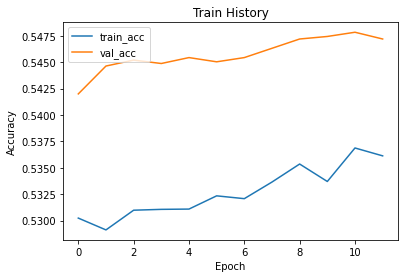

In [18]:
show_train_history('acc','val_acc')